In [1]:
%matplotlib inline

In [2]:
from __future__ import division, print_function

from itertools import product
import math
from os import makedev
from os.path import expanduser, join
import sys

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
sys.path.append(expanduser('~/src/retro'))
from retro.utils.geom import sph2cart_np

In [4]:
sph2cart_np(1, np.pi/2, 0)

(1.0, 0.0, 6.123233995736766e-17)

In [5]:
y = 2*np.pi
def my_mod(x, lower, upper):
    if x >= upper:
        x -= (upper - lower)
    elif x < lower:
        x += (upper - lower)
    if x < lower or x >= upper:
        raise ValueError(x, lower, upper)
    return x

results = np.array([(my_mod(x, 0, y) - x % y) for x in np.linspace(-2*np.pi, 2*np.pi, 1000)])
np.all(results == 0)

True

In [8]:
print("#define PI_f {:.16e}f".format(np.pi))
print("#define TWOPI_f {:.16e}f".format(2 * np.pi))
print("#define FLOAT_EPS {:.16e}f".format(np.finfo(np.float32).eps))
print("#define TENFLOAT_EPS {:.16e}f".format(10 * np.finfo(np.float32).eps))

#define PI_f 3.1415926535897931e+00f
#define TWOPI_f 6.2831853071795862e+00f
#define FLOAT_EPS 1.1920928955078125e-07f
#define TENFLOAT_EPS 1.1920928955078125e-06f


np.linspace(3.0543261766433716e-01, 6.5886182785034180e+00, 9)
FWD_BIN_CENTER 3.8397243022918701e+00
BINS_CENTER 3.4470255374908447e+00
#define PHI_MIN 3.0543261766433716e-01f
#define PHI_MAX 6.5886182785034180e+00f


/home/justin/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:969: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


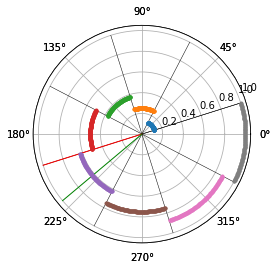

np.linspace(-3.1808626651763916e+00, 3.1023228168487549e+00, 81)
FWD_BIN_CENTER 0.0000000000000000e+00
BINS_CENTER -3.9269924163818359e-02
#define DELTAPHIDIR_MIN -3.1808626651763916e+00f
#define DELTAPHIDIR_MAX 3.1023228168487549e+00f


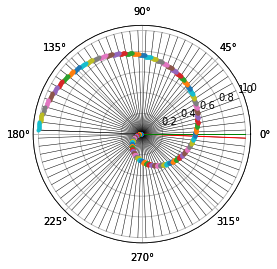

In [9]:
def compute_circular_binning(n_bins, fwd_bin_center, outdir, name, dtype=np.float32):
    np.set_printoptions(precision=16, linewidth=300)
    assert dtype == np.float32, "only float32 handled at the moment"

    dphi = 2*np.pi / n_bins

    dtype_2pi = dtype(2*np.pi)
    lower = dtype(fwd_bin_center - np.pi - dphi/2)
    upper = dtype(lower + dtype_2pi)
    assert upper - lower == dtype_2pi
    be_def = "np.linspace({:.16e}, {:.16e}, {:d})".format(lower, upper, n_bins + 1)
    print(be_def)
    bin_edges = eval(be_def)

    fwd_bin_center = dtype(fwd_bin_center)
    bins_center = dtype(bin_edges[[0, -1]].mean())
    print("FWD_BIN_CENTER {:.16e}".format(fwd_bin_center))
    print("BINS_CENTER {:.16e}".format(bins_center))
    print("#define {}_MIN {:.16e}f".format(name.upper(), lower))
    print("#define {}_MAX {:.16e}f".format(name.upper(), upper))

    xlate = lambda phi: ((dtype(phi) - bins_center + dtype(np.pi)) % dtype(2*np.pi)) + bins_center - dtype(np.pi)
    samps = np.linspace(-np.pi, np.pi, 1000, dtype=dtype)
    idxs = np.digitize(xlate(samps), bin_edges, right=False) - 1
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
    for phi in bin_edges:
        plt.polar([phi]*2, [0, 1], color='k', lw=0.5)
    plt.polar([bins_center]*2, [0, 1], color='r', lw=1)
    plt.polar([fwd_bin_center]*2, [0, 1], color='g', lw=1)
    for i in range(n_bins):
        s = samps[idxs == i]
        plt.polar(s, np.full_like(s, fill_value=(i+1)/n_bins), '.')
    plt.savefig(join(outdir, '{}_binning.png'.format(name)))
    plt.draw()
    plt.show()
    sys.stdout.flush()
    sys.stderr.flush()
    return fwd_bin_center, bins_center, bin_edges, fig, ax

fwd_bin_center_phi, bins_center_phi, phi_bin_edges, fig0, ax0 = compute_circular_binning(
    n_bins=8, fwd_bin_center=np.deg2rad(130 + 90), outdir=".", name="phi"
)
fwd_bin_center_dphidir, bins_center_dphidir, deltaphidir_bin_edges, fig1, ax1 = compute_circular_binning(
    n_bins=80, fwd_bin_center=np.deg2rad(0), outdir=".", name="deltaphidir"
)

In [251]:
print(np.float64(np.float32(3.0543261766433716e-01)) == np.float64(3.0543261766433716e-01))
print(np.float32(6.5886182785034180e+00) == np.float64(6.5886182785034180e+00))
print(np.float32(-3.1808626651763916e+00) == np.float64(-3.1808626651763916e+00))
print(np.float32(3.1023228168487549e+00) == np.float64(3.1023228168487549e+00))

True
True
True
True


In [10]:
fwd_bin_center_phi, fwd_bin_center_dphidir

(3.8397243, 0.0)

dom pos&time: [0. 0. 0. 0.] photon pos&time: [0.6123724356957946 0.6123724356957945 0.4999999999999999 1.                ]
dirAndWlen: [1.000000000000000e+00 0.000000000000000e+00 6.123233995736766e-17 1.000000000000000e+00]
r = 1.0, costheta = 0.5, phi = 0.785398163397, costhetadir = 0, deltaphidir = -0.785398163397
          r: +1.000 +1.000
   costheta: +0.500 +0.500
        phi: +0.785 +0.785
          t: +0.000 +0.000
costhetadir: -0.000 +0.000
deltaphidir: -0.785 -0.785
        phi: lower = +0.30849, upper = +6.57909, range/2pi = +0.99800
deltaphidir: lower = -3.17937, upper = +3.09123, range/2pi = +0.99800


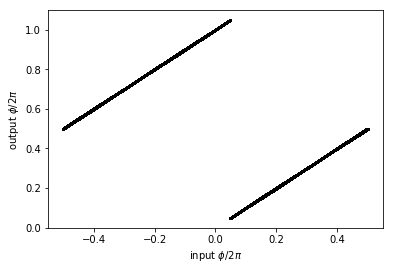

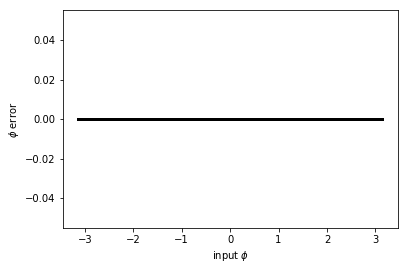

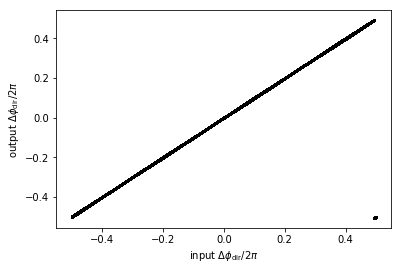

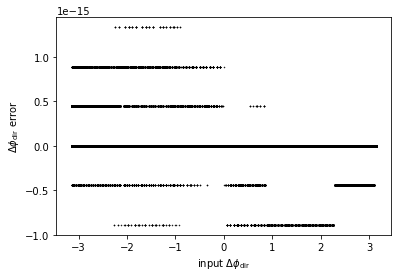

In [11]:
PI = np.pi

min_invGroupVel = 1
dtype = np.dtype(
    [
        ('r', np.float64),
        ('costheta', np.float64),
        ('phi', np.float64),
        ('t', np.float64),
        ('costhetadir', np.float64),
        ('deltaphidir', np.float64),
    ]
)

PHI0_range = phi_bin_edges[[0, -1]]
DPHI0_range = deltaphidir_bin_edges[[0, -1]]

PHI0 = fwd_bin_center_phi
DPHI0 = fwd_bin_center_dphidir


def getAbsCoordinates(
    absPos,      # photon position & time
    dirAndWlen,
    posAndTime,  # DOM position & time
):
    pos = absPos - posAndTime
    s0 = np.sqrt(np.sum(pos[:3]**2))
    s1 = pos[2] / s0 if s0 > 0 else 0
    rho2 = pos[0]**2 + pos[1]**2
    phi = np.arctan2(pos[1], pos[0]) if (rho2 > 0.) else 0.
    s2 = phi
    if s2 < phi_bin_edges[0]:
        s2 += 2*PI
    elif s2 >= phi_bin_edges[-1]:
        s2 -= 2*PI
    if s2 < PHI0_range[0] or s2 >= PHI0_range[1]:
        raise ValueError(phi, s2, PHI0_range)
    s3 = pos[3] - s0*min_invGroupVel
    s4 = -dirAndWlen[2];
    rho2_photon = dirAndWlen[0]**2 + dirAndWlen[1]**2
    phi_photon = np.arctan2(dirAndWlen[1], dirAndWlen[0]) if (rho2_photon > 0.) else 0.
    s5 = phi_photon - phi
    if s5 < deltaphidir_bin_edges[0]:
        s5 += 2*PI
    elif s5 >= deltaphidir_bin_edges[-1]:
        s5 -= 2*PI
    if s5 < DPHI0_range[0] or s5 >= DPHI0_range[1]:
        raise ValueError(phi_photon, s5, DPHI0_range)

    return np.array((s0, s1, s2, s3, s4, s5), dtype=dtype)


r, costheta, phi = 1., .5, np.pi/4
costhetadir = 0
deltaphidir = -np.pi/4
t = 0
ref = np.array((r, costheta, phi, t, costhetadir, deltaphidir), dtype=dtype)

diff_pos = sph2cart_np(r=r, theta=np.arccos(costheta), phi=phi)

posAndTime = np.array([0, 0, 0, 0], dtype=float)
absPos = np.array([0, 0, 0, 1], dtype=float)
absPos[:3] = posAndTime[:3] + diff_pos
dirAndWlen = np.array([0, 0, 0, 1], dtype=float)

dirAndWlen[:3] = sph2cart_np(r=1, theta=np.arccos(costhetadir), phi=phi + deltaphidir)

print('dom pos&time:', posAndTime, 'photon pos&time:', absPos)
print('dirAndWlen:', dirAndWlen)
print('r = {}, costheta = {}, phi = {}, costhetadir = {}, deltaphidir = {}'.format(r, costheta, phi, costhetadir, deltaphidir))

out = getAbsCoordinates(absPos, dirAndWlen, posAndTime)
for name, vals in zip(out.dtype.names, [(np.float64(out[n]), np.float64(ref[n])) for n in out.dtype.names]):
    print('{}: {:+.3f} {:+.3f}'.format(name.rjust(11), *vals))


# --  -- #

eps = 1e-2
n_samples = 500

# phis = np.linspace(-PHI0-np.pi, PHI0+np.pi, n_samples)
# deltaphidirs = np.linspace(-DPHI0-np.pi, DPHI0+np.pi, n_samples)

# phis = np.array(
#     [
#         -2*np.pi, -2*np.pi+eps,
#         -np.pi-eps, -np.pi, -np.pi+eps,
#         -eps, 0, eps,
#         np.pi-eps, np.pi, np.pi+eps,
#         2*np.pi-eps, 2*np.pi,
#     ]
# )

phis = np.linspace(-np.pi, np.pi, n_samples)
deltaphidirs = phis

r, costheta = 1., 0
costhetadir = 0
t = 0.

posAndTime = np.zeros(4, dtype=float)
absPos = np.ones(4, dtype=float)
dirAndWlen = np.ones(4, dtype=float)

inputs = []
out = []
indtype = np.dtype([('phi', np.float64), ('deltaphidir', np.float64)])
for phi, deltaphidir in product(phis, deltaphidirs):
    diff_pos = sph2cart_np(r=r, theta=np.arccos(costheta), phi=phi)
    absPos[:3] = posAndTime[:3] + diff_pos
    dirAndWlen[:3] = sph2cart_np(r=1, theta=np.arccos(costhetadir), phi=phi + deltaphidir)
    inputs.append(np.array((phi, deltaphidir), dtype=indtype))
    out.append(getAbsCoordinates(absPos, dirAndWlen, posAndTime))
inputs = np.array(inputs)
out = np.array(out)

lower, upper = out['phi'].min(), out['phi'].max()
print("        phi: lower = {:+.5f}, upper = {:+.5f}, range/2pi = {:+.5f}".format(lower, upper, (upper - lower)/2/np.pi))

lower, upper = out['deltaphidir'].min(), out['deltaphidir'].max()
print("deltaphidir: lower = {:+.5f}, upper = {:+.5f}, range/2pi = {:+.5f}".format(lower, upper, (upper - lower)/2/np.pi))

fig, ax = plt.subplots()
ax.plot((inputs['phi'])/2/np.pi,  (out['phi'])/2/np.pi, 'k.', ms=1)
ax.set_xlabel(r'input $\phi / 2\pi$')
ax.set_ylabel(r'output $\phi / 2\pi$')

fig, ax = plt.subplots()
ax.plot(inputs['phi'], np.mod(out['phi'] - inputs['phi'] + np.pi, 2*np.pi) - np.pi, 'k.', ms=1)
ax.set_xlabel(r'input $\phi$')
ax.set_ylabel(r'$\phi$ error')

fig, ax = plt.subplots()
ax.plot((inputs['deltaphidir'])/2/np.pi,  (out['deltaphidir'])/2/np.pi, 'k.', ms=1)
ax.set_xlabel(r'input $\Delta\phi_{\rm dir} / 2\pi$')
ax.set_ylabel(r'output $\Delta\phi_{\rm dir} / 2\pi$')

fig, ax = plt.subplots()
ax.plot(inputs['deltaphidir'], np.mod(out['deltaphidir'] - inputs['deltaphidir'] + np.pi, 2*np.pi) - np.pi, 'k.', ms=1)
ax.set_xlabel(r'input $\Delta\phi_{\rm dir}$')
ax.set_ylabel(r'$\Delta\phi_{\rm dir}$ error')
pass